## Reading Data

In [2]:
import pandas as pd

real_data = pd.read_csv('genuine.csv')
fake_data = pd.read_csv('fake.csv')

In [3]:
real_data.head()

,Unnamed: 0,id,text
0,0,1255539980610555906,RT @WHO: Media briefing on #COVID19 with @DrTe...
1,1,1235249562136309761,RT @SharylAttkisson: I defer to https://t.co/2...
2,2,1259871554822955008,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case..."
3,3,1264183579652825088,NEW: China reported no new confirmed cases of ...
4,4,1264141525815930880,".@CDCgov, the apex health agency of USA revise..."


## Tweepy Settings

In [5]:
import tweepy
import requests

CONSUMER_API_KEY = "PUT_YOUR_CONSUMER_API_KEY"
CONSUMER_API_KEY_SECRET = "PUT_YOUR_CONSUMER_API_KEY_SECRET"
 
ACCESS_TOKEN = "PUT_YOUR_ACCESS_TOKEN"
ACCESS_TOKEN_SECRET = "PUT_YOUR_ACCESS_TOKEN_SECRET"
 
BEARER = "PUT_YOUR_BEARER"

client = tweepy.Client(bearer_token=BEARER
                        , consumer_key=CONSUMER_API_KEY,
                        consumer_secret=CONSUMER_API_KEY_SECRET,
                        access_token=ACCESS_TOKEN,
                        access_token_secret=ACCESS_TOKEN_SECRET,
                        return_type = requests.Response
                        )

## Retrieving Data

In [6]:
batch_size = 100
tweet_fields = ["public_metrics", "created_at", "entities", "author_id"]
user_fields = ["name", "username", "location", "public_metrics"]

In [7]:
def batch(iterable, n=1):
    l = len(iterable)
    for ndx in range(0, l, n):
        yield iterable[ndx:min(ndx + n, l)]

In [8]:
def fetch_tweet_fields(dataset):
    all_tweets = dict((k, []) for k in ["data", "users", "errors"])
    
    ids = list(dataset["id"])    
    for id_batch in batch(ids, batch_size):
        tweet_batch = client.get_tweets(id_batch, 
                        tweet_fields= tweet_fields, 
                        user_fields=user_fields, 
                        expansions="author_id",
                        user_auth=True
                        )

        if tweet_batch.json().get("data"): all_tweets["data"].extend(tweet_batch.json()["data"])
        if tweet_batch.json().get("includes"): all_tweets["users"].extend(tweet_batch.json()["includes"]["users"])
        if tweet_batch.json().get("errors"): all_tweets["errors"].extend(tweet_batch.json()["errors"])

        
    return all_tweets

In [9]:
real_tweets=fetch_tweet_fields(real_data)
fake_tweets=fetch_tweet_fields(fake_data)

In [10]:
len(real_tweets["data"]), len(fake_tweets["data"])

(1914, 1306)

In [11]:
len(real_tweets["users"]), len(fake_tweets["users"])

(1031, 1305)

In [12]:
len(real_tweets["errors"]), len(fake_tweets["errors"])

(87, 695)

In [14]:
real_tweets_data = pd.json_normalize(real_tweets['data'])
real_tweets_users = pd.json_normalize(real_tweets['users'])

fake_tweets_data = pd.json_normalize(fake_tweets['data'])
fake_tweets_users = pd.json_normalize(fake_tweets['users'])

In [15]:
real_tweets_data.head()

,text,id,created_at,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,entities.mentions,entities.urls,entities.hashtags,entities.annotations
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...","[{'start': 52, 'end': 75, 'url': 'https://t.co...","[{'start': 27, 'end': 35, 'tag': 'COVID19'}]",NaN
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,"[{'start': 271, 'end': 280, 'username': 'DrTed...",NaN,"[{'start': 33, 'end': 41, 'tag': 'COVID19'}]","[{'start': 4, 'end': 8, 'probability': 0.6603,..."
2,NEW: China reported no new confirmed cases of ...,1264183579652825088,2020-05-23T13:17:07.000Z,16012783,13,7,30,2,NaN,"[{'start': 153, 'end': 176, 'url': 'https://t....",NaN,"[{'start': 5, 'end': 9, 'probability': 0.9779,..."
3,".@CDCgov, the apex health agency of USA revise...",1264141525815930880,2020-05-23T10:30:01.000Z,2392031700,1,0,3,0,"[{'start': 1, 'end': 8, 'username': 'CDCgov', ...","[{'start': 257, 'end': 280, 'url': 'https://t....","[{'start': 230, 'end': 238, 'tag': 'COVID19'},...","[{'start': 36, 'end': 38, 'probability': 0.834..."
4,Get the latest updates about #COVID19 on our w...,1262095542110339073,2020-05-17T19:00:00.000Z,23711785,1,0,2,0,NaN,"[{'start': 54, 'end': 77, 'url': 'https://t.co...","[{'start': 29, 'end': 37, 'tag': 'COVID19'}, {...",NaN


In [16]:
real_tweets_users.head()

,name,location,username,id,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,Prof Manohar K.,"Nagpur, India",Prof_Manohara,949491464651776001,195,613,3873,0
1,World Health Organization (WHO),"Geneva, Switzerland",WHO,14499829,11078488,1751,68999,35072
2,The Daily Beast,"New York, NY",thedailybeast,16012783,1370076,1027,380853,22950
3,BOOM Live,"Mumbai, India",boomlive_in,2392031700,74940,1178,38829,672
4,Mass. Public Health,"Boston, MA",MassDPH,23711785,64131,337,20482,1062


In [17]:
fake_tweets_users.head()

,username,name,location,id,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,withheld.country_codes
0,obrien_BCFC,Cast Iron O’Brien,"South Tipperary, Ireland",502094222,308,409,12938,4,NaN
1,emirodriguez024,emily rodriguez,"California, USA",774075538315051010,336,228,19351,0,NaN
2,TMe1official,Four-eyed Ogun boy 🤓 ♥️💡,"Lagos, Nigeria",1625926550,1763,3119,5524,0,NaN
3,Greatestchyran,💕 Manish Kumar MÚNOTH 💞,Rajsthan,834074584768974852,652,50,55547,0,NaN
4,srem60,Natasha,NaN,4685654556,84,261,7067,0,NaN


## Data Pre-Processing and Cleaning

In [18]:
real_tweets_data.rename(columns={"id":"tweet_id"}, inplace=True)
fake_tweets_data.rename(columns={"id":"tweet_id"}, inplace=True)

real_tweets_users.rename(columns={"id":"author_id"}, inplace=True)
fake_tweets_users.rename(columns={"id":"author_id"}, inplace=True)

In [19]:
#real_tweets_users = real_tweets_users.loc[real_tweets_users.astype(str).drop_duplicates().index]
real_tweets_users = real_tweets_users.loc[real_tweets_users.astype(str).drop_duplicates(subset='author_id', keep="last").index]
fake_tweets_users = fake_tweets_users.loc[fake_tweets_users.astype(str).drop_duplicates(subset='author_id', keep="last").index]

In [20]:
real_tweets_data.head()

,text,tweet_id,created_at,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,entities.mentions,entities.urls,entities.hashtags,entities.annotations
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...","[{'start': 52, 'end': 75, 'url': 'https://t.co...","[{'start': 27, 'end': 35, 'tag': 'COVID19'}]",NaN
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,"[{'start': 271, 'end': 280, 'username': 'DrTed...",NaN,"[{'start': 33, 'end': 41, 'tag': 'COVID19'}]","[{'start': 4, 'end': 8, 'probability': 0.6603,..."
2,NEW: China reported no new confirmed cases of ...,1264183579652825088,2020-05-23T13:17:07.000Z,16012783,13,7,30,2,NaN,"[{'start': 153, 'end': 176, 'url': 'https://t....",NaN,"[{'start': 5, 'end': 9, 'probability': 0.9779,..."
3,".@CDCgov, the apex health agency of USA revise...",1264141525815930880,2020-05-23T10:30:01.000Z,2392031700,1,0,3,0,"[{'start': 1, 'end': 8, 'username': 'CDCgov', ...","[{'start': 257, 'end': 280, 'url': 'https://t....","[{'start': 230, 'end': 238, 'tag': 'COVID19'},...","[{'start': 36, 'end': 38, 'probability': 0.834..."
4,Get the latest updates about #COVID19 on our w...,1262095542110339073,2020-05-17T19:00:00.000Z,23711785,1,0,2,0,NaN,"[{'start': 54, 'end': 77, 'url': 'https://t.co...","[{'start': 29, 'end': 37, 'tag': 'COVID19'}, {...",NaN


In [21]:
merged_real_tweets=pd.merge(real_tweets_data, real_tweets_users, on='author_id')
merged_fake_tweets=pd.merge(fake_tweets_data, fake_tweets_users, on='author_id')

In [22]:
merged_real_tweets.shape, merged_fake_tweets.shape

((1914, 19), (1306, 23))

In [23]:
merged_real_tweets.head()

,text,tweet_id,created_at,author_id,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,entities.mentions,entities.urls,entities.hashtags,entities.annotations,name,location,username,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...","[{'start': 52, 'end': 75, 'url': 'https://t.co...","[{'start': 27, 'end': 35, 'tag': 'COVID19'}]",NaN,Prof Manohar K.,"Nagpur, India",Prof_Manohara,195,613,3873,0
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,"[{'start': 271, 'end': 280, 'username': 'DrTed...",NaN,"[{'start': 33, 'end': 41, 'tag': 'COVID19'}]","[{'start': 4, 'end': 8, 'probability': 0.6603,...",World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
2,Media briefing on #COVID19 with @DrTedros. #co...,1247188892714807296,2020-04-06T15:46:18.000Z,14499829,1845,500,3642,200,"[{'start': 32, 'end': 41, 'username': 'DrTedro...","[{'start': 56, 'end': 79, 'url': 'https://t.co...","[{'start': 18, 'end': 26, 'tag': 'COVID19'}, {...",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
3,RT @WHO: WHO’s #COVID19 response includes a pr...,1251675306450173952,2020-04-19T00:53:42.000Z,14499829,251,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...",NaN,"[{'start': 15, 'end': 23, 'tag': 'COVID19'}]",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
4,#AskWHO about breastfeeding during #COVID19 ht...,1259785723789500418,2020-05-11T10:01:36.000Z,14499829,358,95,926,28,NaN,"[{'start': 44, 'end': 67, 'url': 'https://t.co...","[{'start': 0, 'end': 7, 'tag': 'AskWHO'}, {'st...",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072


In [24]:
merged_fake_tweets.head()

,author_id,created_at,tweet_id,text,entities.mentions,entities.urls,public_metrics.retweet_count,public_metrics.reply_count,public_metrics.like_count,public_metrics.quote_count,...,withheld.copyright,withheld.country_codes_x,username,name,location,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,public_metrics.listed_count,withheld.country_codes_y
0,502094222,2020-03-14T13:00:11.000Z,1238812169095057408,RT @OldClassicBrown: If you have ever been her...,"[{'start': 3, 'end': 19, 'username': 'OldClass...","[{'start': 98, 'end': 121, 'url': 'https://t.c...",33,0,0,0,...,NaN,NaN,obrien_BCFC,Cast Iron O’Brien,"South Tipperary, Ireland",308,409,12938,4,NaN
1,774075538315051010,2020-03-04T05:16:29.000Z,1235071594906537985,RT @hollaa_backk: if you’ve ever used a frat h...,"[{'start': 3, 'end': 16, 'username': 'hollaa_b...",NaN,43119,0,0,0,...,NaN,NaN,emirodriguez024,emily rodriguez,"California, USA",336,228,19351,0,NaN
2,1625926550,2020-02-03T16:22:05.000Z,1224367464617861121,RT @TMe1official: Cocaine cures corona virus!!...,"[{'start': 3, 'end': 16, 'username': 'TMe1offi...",NaN,1,0,0,0,...,NaN,NaN,TMe1official,Four-eyed Ogun boy 🤓 ♥️💡,"Lagos, Nigeria",1763,3119,5524,0,NaN
3,834074584768974852,2020-02-02T10:49:42.000Z,1223921427608264704,RT @Kittuadwani2: True worship can cure incura...,"[{'start': 3, 'end': 16, 'username': 'Kittuadw...",NaN,249,0,0,0,...,NaN,NaN,Greatestchyran,💕 Manish Kumar MÚNOTH 💞,Rajsthan,652,50,55547,0,NaN
4,4685654556,2020-01-25T17:30:19.000Z,1221123142434861057,RT @WatcherDead: Since the MSM is bashing peop...,"[{'start': 3, 'end': 15, 'username': 'WatcherD...",NaN,364,0,0,0,...,NaN,NaN,srem60,Natasha,NaN,84,261,7067,0,NaN


In [26]:
merged_real_tweets.keys()

Index(['text', 'tweet_id', 'created_at', 'author_id',
       'public_metrics.retweet_count', 'public_metrics.reply_count',
       'public_metrics.like_count', 'public_metrics.quote_count',
       'entities.mentions', 'entities.urls', 'entities.hashtags',
       'entities.annotations', 'name', 'location', 'username',
       'public_metrics.followers_count', 'public_metrics.following_count',
       'public_metrics.tweet_count', 'public_metrics.listed_count'],
      dtype='object')

In [27]:
def beautify_field_names(data):
    data = data.rename(columns={"entities.hashtags":"hashtags",
                        "entities.mentions":"mentions",
                        "entities.urls":"urls",
                        "public_metrics.retweet_count": "retweet_count",
                        "public_metrics.reply_count": "reply_count",
                        "public_metrics.like_count": "like_count",
                        "public_metrics.quote_count": "quote_count",
                        "entities.annotations": "annotations",
                        "name":"retweeter_name",
                        "username":"retweeter_username",
                        "public_metrics.followers_count":"retweeter_followers_count",
                        "public_metrics.following_count":"retweeter_following_count",
                        "public_metrics.tweet_count":"retweeter_tweet_count",
                        "public_metrics.listed_count":"retweeter_listed_count"}, inplace=True)

In [28]:
beautify_field_names(merged_real_tweets)
beautify_field_names(merged_fake_tweets)
merged_real_tweets.head()

,text,tweet_id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,mentions,urls,hashtags,annotations,retweeter_name,location,retweeter_username,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,retweeter_listed_count
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...","[{'start': 52, 'end': 75, 'url': 'https://t.co...","[{'start': 27, 'end': 35, 'tag': 'COVID19'}]",NaN,Prof Manohar K.,"Nagpur, India",Prof_Manohara,195,613,3873,0
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,"[{'start': 271, 'end': 280, 'username': 'DrTed...",NaN,"[{'start': 33, 'end': 41, 'tag': 'COVID19'}]","[{'start': 4, 'end': 8, 'probability': 0.6603,...",World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
2,Media briefing on #COVID19 with @DrTedros. #co...,1247188892714807296,2020-04-06T15:46:18.000Z,14499829,1845,500,3642,200,"[{'start': 32, 'end': 41, 'username': 'DrTedro...","[{'start': 56, 'end': 79, 'url': 'https://t.co...","[{'start': 18, 'end': 26, 'tag': 'COVID19'}, {...",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
3,RT @WHO: WHO’s #COVID19 response includes a pr...,1251675306450173952,2020-04-19T00:53:42.000Z,14499829,251,0,0,0,"[{'start': 3, 'end': 7, 'username': 'WHO', 'id...",NaN,"[{'start': 15, 'end': 23, 'tag': 'COVID19'}]",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
4,#AskWHO about breastfeeding during #COVID19 ht...,1259785723789500418,2020-05-11T10:01:36.000Z,14499829,358,95,926,28,NaN,"[{'start': 44, 'end': 67, 'url': 'https://t.co...","[{'start': 0, 'end': 7, 'tag': 'AskWHO'}, {'st...",NaN,World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072


In [29]:
def beautify_items_with_lists(data):
    data["location"] = data["location"].fillna("")
    data["hashtags"] = data["hashtags"].fillna("").apply(list)
    data["mentions"] = data["mentions"].fillna("").apply(list)
    data["urls"] = data["urls"].fillna("").apply(list)
    data["annotations"] = data["annotations"].fillna("").apply(list)
    data["hashtags"] = data["hashtags"].apply(lambda x: [item["tag"] for item in x])
    data["mentions"] = data["mentions"].apply(lambda x: [item["username"] for item in x])
    data["urls"] = data["urls"].apply(lambda x: [item["url"] for item in x])

In [30]:
beautify_items_with_lists(merged_real_tweets)
merged_real_tweets.head()

,text,tweet_id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,mentions,urls,hashtags,annotations,retweeter_name,location,retweeter_username,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,retweeter_listed_count
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[WHO, DrTedros]",[https://t.co/WC2ljICW8i],[COVID19],[],Prof Manohar K.,"Nagpur, India",Prof_Manohara,195,613,3873,0
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,[DrTedros],[],[COVID19],"[{'start': 4, 'end': 8, 'probability': 0.6603,...",World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
2,Media briefing on #COVID19 with @DrTedros. #co...,1247188892714807296,2020-04-06T15:46:18.000Z,14499829,1845,500,3642,200,[DrTedros],[https://t.co/e5rc2jbeZu],"[COVID19, coronavirus]",[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
3,RT @WHO: WHO’s #COVID19 response includes a pr...,1251675306450173952,2020-04-19T00:53:42.000Z,14499829,251,0,0,0,[WHO],[],[COVID19],[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072
4,#AskWHO about breastfeeding during #COVID19 ht...,1259785723789500418,2020-05-11T10:01:36.000Z,14499829,358,95,926,28,[],[https://t.co/7CPwA7YmFl],"[AskWHO, COVID19]",[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072


In [31]:
beautify_items_with_lists(merged_fake_tweets)
merged_fake_tweets.head()

,author_id,created_at,tweet_id,text,mentions,urls,retweet_count,reply_count,like_count,quote_count,...,withheld.copyright,withheld.country_codes_x,retweeter_username,retweeter_name,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,retweeter_listed_count,withheld.country_codes_y
0,502094222,2020-03-14T13:00:11.000Z,1238812169095057408,RT @OldClassicBrown: If you have ever been her...,[OldClassicBrown],[https://t.co/tRdrrxJskF],33,0,0,0,...,NaN,NaN,obrien_BCFC,Cast Iron O’Brien,"South Tipperary, Ireland",308,409,12938,4,NaN
1,774075538315051010,2020-03-04T05:16:29.000Z,1235071594906537985,RT @hollaa_backk: if you’ve ever used a frat h...,[hollaa_backk],[],43119,0,0,0,...,NaN,NaN,emirodriguez024,emily rodriguez,"California, USA",336,228,19351,0,NaN
2,1625926550,2020-02-03T16:22:05.000Z,1224367464617861121,RT @TMe1official: Cocaine cures corona virus!!...,[TMe1official],[],1,0,0,0,...,NaN,NaN,TMe1official,Four-eyed Ogun boy 🤓 ♥️💡,"Lagos, Nigeria",1763,3119,5524,0,NaN
3,834074584768974852,2020-02-02T10:49:42.000Z,1223921427608264704,RT @Kittuadwani2: True worship can cure incura...,[Kittuadwani2],[],249,0,0,0,...,NaN,NaN,Greatestchyran,💕 Manish Kumar MÚNOTH 💞,Rajsthan,652,50,55547,0,NaN
4,4685654556,2020-01-25T17:30:19.000Z,1221123142434861057,RT @WatcherDead: Since the MSM is bashing peop...,[WatcherDead],[],364,0,0,0,...,NaN,NaN,srem60,Natasha,,84,261,7067,0,NaN


In [32]:
merged_real_tweets["text"] = merged_real_tweets['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)
merged_fake_tweets["text"] = merged_fake_tweets['text'].replace(r'http\S+', '', regex=True).replace(r'www\S+', '', regex=True)


## Retrieiving Owner User Name

In [33]:
def get_owner_username(tweet):
    text = tweet["text"]
    if text.startswith("RT @"):
        return text[text.index("@")+1:text.index(":")]
    else:
        return tweet["retweeter_username"]

In [34]:
merged_real_tweets['owner_username'] = merged_real_tweets.apply(lambda item: get_owner_username(item), axis=1)
merged_real_tweets.head()

,text,tweet_id,created_at,author_id,retweet_count,reply_count,like_count,quote_count,mentions,urls,hashtags,annotations,retweeter_name,location,retweeter_username,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,retweeter_listed_count,owner_username
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,1255539980610555906,2020-04-29T16:50:32.000Z,949491464651776001,892,0,0,0,"[WHO, DrTedros]",[https://t.co/WC2ljICW8i],[COVID19],[],Prof Manohar K.,"Nagpur, India",Prof_Manohara,195,613,3873,0,WHO
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",1259871554822955008,2020-05-11T15:42:40.000Z,14499829,55,12,123,9,[DrTedros],[],[COVID19],"[{'start': 4, 'end': 8, 'probability': 0.6603,...",World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072,WHO
2,Media briefing on #COVID19 with @DrTedros. #co...,1247188892714807296,2020-04-06T15:46:18.000Z,14499829,1845,500,3642,200,[DrTedros],[https://t.co/e5rc2jbeZu],"[COVID19, coronavirus]",[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072,WHO
3,RT @WHO: WHO’s #COVID19 response includes a pr...,1251675306450173952,2020-04-19T00:53:42.000Z,14499829,251,0,0,0,[WHO],[],[COVID19],[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072,WHO
4,#AskWHO about breastfeeding during #COVID19,1259785723789500418,2020-05-11T10:01:36.000Z,14499829,358,95,926,28,[],[https://t.co/7CPwA7YmFl],"[AskWHO, COVID19]",[],World Health Organization (WHO),"Geneva, Switzerland",WHO,11078491,1751,68999,35072,WHO


In [35]:
merged_fake_tweets['owner_username'] = merged_fake_tweets.apply(lambda item: get_owner_username(item), axis=1)
merged_fake_tweets.head()

,author_id,created_at,tweet_id,text,mentions,urls,retweet_count,reply_count,like_count,quote_count,...,withheld.country_codes_x,retweeter_username,retweeter_name,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,retweeter_listed_count,withheld.country_codes_y,owner_username
0,502094222,2020-03-14T13:00:11.000Z,1238812169095057408,RT @OldClassicBrown: If you have ever been her...,[OldClassicBrown],[https://t.co/tRdrrxJskF],33,0,0,0,...,NaN,obrien_BCFC,Cast Iron O’Brien,"South Tipperary, Ireland",308,409,12938,4,NaN,OldClassicBrown
1,774075538315051010,2020-03-04T05:16:29.000Z,1235071594906537985,RT @hollaa_backk: if you’ve ever used a frat h...,[hollaa_backk],[],43119,0,0,0,...,NaN,emirodriguez024,emily rodriguez,"California, USA",336,228,19351,0,NaN,hollaa_backk
2,1625926550,2020-02-03T16:22:05.000Z,1224367464617861121,RT @TMe1official: Cocaine cures corona virus!!...,[TMe1official],[],1,0,0,0,...,NaN,TMe1official,Four-eyed Ogun boy 🤓 ♥️💡,"Lagos, Nigeria",1763,3119,5524,0,NaN,TMe1official
3,834074584768974852,2020-02-02T10:49:42.000Z,1223921427608264704,RT @Kittuadwani2: True worship can cure incura...,[Kittuadwani2],[],249,0,0,0,...,NaN,Greatestchyran,💕 Manish Kumar MÚNOTH 💞,Rajsthan,652,50,55547,0,NaN,Kittuadwani2
4,4685654556,2020-01-25T17:30:19.000Z,1221123142434861057,RT @WatcherDead: Since the MSM is bashing peop...,[WatcherDead],[],364,0,0,0,...,NaN,srem60,Natasha,,84,261,7067,0,NaN,WatcherDead


In [36]:
merged_real_tweets.keys()

Index(['text', 'tweet_id', 'created_at', 'author_id', 'retweet_count',
       'reply_count', 'like_count', 'quote_count', 'mentions', 'urls',
       'hashtags', 'annotations', 'retweeter_name', 'location',
       'retweeter_username', 'retweeter_followers_count',
       'retweeter_following_count', 'retweeter_tweet_count',
       'retweeter_listed_count', 'owner_username'],
      dtype='object')

## Selecting Features for Analysis

In [37]:
sub_real_tweets = merged_real_tweets[['text', 'mentions', 'urls', 'hashtags', 'retweet_count', 'reply_count', 'like_count',
                                      'owner_username', 'retweeter_username', 'location', 'retweeter_followers_count',
                                      'retweeter_following_count', 'retweeter_tweet_count']]
sub_real_tweets.head()


,text,mentions,urls,hashtags,retweet_count,reply_count,like_count,owner_username,retweeter_username,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,"[WHO, DrTedros]",[https://t.co/WC2ljICW8i],[COVID19],892,0,0,WHO,Prof_Manohara,"Nagpur, India",195,613,3873
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",[DrTedros],[],[COVID19],55,12,123,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999
2,Media briefing on #COVID19 with @DrTedros. #co...,[DrTedros],[https://t.co/e5rc2jbeZu],"[COVID19, coronavirus]",1845,500,3642,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999
3,RT @WHO: WHO’s #COVID19 response includes a pr...,[WHO],[],[COVID19],251,0,0,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999
4,#AskWHO about breastfeeding during #COVID19,[],[https://t.co/7CPwA7YmFl],"[AskWHO, COVID19]",358,95,926,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999


In [38]:
sub_fake_tweets = merged_fake_tweets[['text', 'mentions', 'urls', 'hashtags', 'retweet_count', 'reply_count', 'like_count',
                                      'owner_username', 'retweeter_username', 'location', 'retweeter_followers_count',
                                      'retweeter_following_count', 'retweeter_tweet_count']]
sub_fake_tweets.head()


,text,mentions,urls,hashtags,retweet_count,reply_count,like_count,owner_username,retweeter_username,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count
0,RT @OldClassicBrown: If you have ever been her...,[OldClassicBrown],[https://t.co/tRdrrxJskF],[],33,0,0,OldClassicBrown,obrien_BCFC,"South Tipperary, Ireland",308,409,12938
1,RT @hollaa_backk: if you’ve ever used a frat h...,[hollaa_backk],[],[],43119,0,0,hollaa_backk,emirodriguez024,"California, USA",336,228,19351
2,RT @TMe1official: Cocaine cures corona virus!!...,[TMe1official],[],[],1,0,0,TMe1official,TMe1official,"Lagos, Nigeria",1763,3119,5524
3,RT @Kittuadwani2: True worship can cure incura...,[Kittuadwani2],[],[],249,0,0,Kittuadwani2,Greatestchyran,Rajsthan,652,50,55547
4,RT @WatcherDead: Since the MSM is bashing peop...,[WatcherDead],[],[],364,0,0,WatcherDead,srem60,,84,261,7067


## NLP Analysis

In [40]:
from textblob import TextBlob

# a float within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

In [41]:
# -1 defines a negative sentiment and 1 defines a positive sentiment
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

In [ ]:
real_polarities = [getPolarity(content["text"]) for index, content in sub_real_tweets.iterrows()]
real_subjectivities = [getSubjectivity(content["text"]) for index, content in sub_real_tweets.iterrows()]
sub_real_tweets["polarity"] = real_polarities
sub_real_tweets["subjectivity"] = real_subjectivities

In [ ]:
fake_polarities = [getPolarity(content["text"]) for index, content in sub_fake_tweets.iterrows()]
fake_subjectivities = [getSubjectivity(content["text"]) for index, content in sub_fake_tweets.iterrows()]
sub_fake_tweets["polarity"] = fake_polarities
sub_fake_tweets["subjectivity"] = fake_subjectivities

In [44]:
sub_fake_tweets.head()

,text,mentions,urls,hashtags,retweet_count,reply_count,like_count,owner_username,retweeter_username,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,polarity,subjectivity
0,RT @OldClassicBrown: If you have ever been her...,[OldClassicBrown],[https://t.co/tRdrrxJskF],[],33,0,0,OldClassicBrown,obrien_BCFC,"South Tipperary, Ireland",308,409,12938,0.000,0.000
1,RT @hollaa_backk: if you’ve ever used a frat h...,[hollaa_backk],[],[],43119,0,0,hollaa_backk,emirodriguez024,"California, USA",336,228,19351,0.000,0.000
2,RT @TMe1official: Cocaine cures corona virus!!...,[TMe1official],[],[],1,0,0,TMe1official,TMe1official,"Lagos, Nigeria",1763,3119,5524,0.500,0.500
3,RT @Kittuadwani2: True worship can cure incura...,[Kittuadwani2],[],[],249,0,0,Kittuadwani2,Greatestchyran,Rajsthan,652,50,55547,-0.075,0.625
4,RT @WatcherDead: Since the MSM is bashing peop...,[WatcherDead],[],[],364,0,0,WatcherDead,srem60,,84,261,7067,0.000,0.000


In [45]:
sub_real_tweets.head()

,text,mentions,urls,hashtags,retweet_count,reply_count,like_count,owner_username,retweeter_username,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,polarity,subjectivity
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,"[WHO, DrTedros]",[https://t.co/WC2ljICW8i],[COVID19],892,0,0,WHO,Prof_Manohara,"Nagpur, India",195,613,3873,0.0,0.0
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",[DrTedros],[],[COVID19],55,12,123,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.4,0.7
2,Media briefing on #COVID19 with @DrTedros. #co...,[DrTedros],[https://t.co/e5rc2jbeZu],"[COVID19, coronavirus]",1845,500,3642,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0
3,RT @WHO: WHO’s #COVID19 response includes a pr...,[WHO],[],[COVID19],251,0,0,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0
4,#AskWHO about breastfeeding during #COVID19,[],[https://t.co/7CPwA7YmFl],"[AskWHO, COVID19]",358,95,926,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0


## Plotting NLP Analysis 

In [46]:
polarity_labels = ["Positive", "Negative", "Neutral"]
subjectivity_labels = ["Subjective", "Objective", "Neutral"]

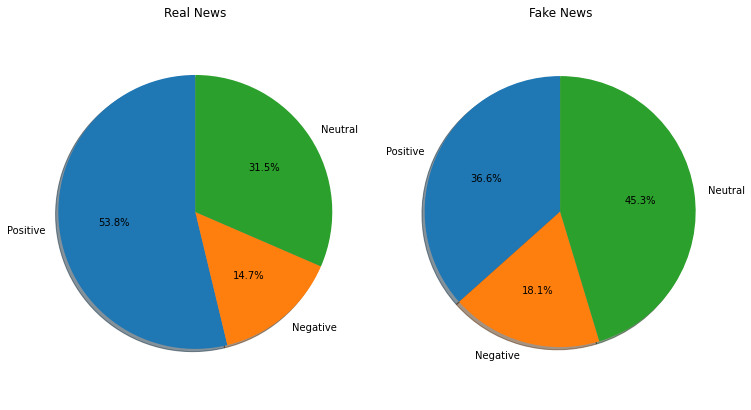

In [47]:
import matplotlib.pyplot as plt
pos_size_real = sub_real_tweets.loc[sub_real_tweets['polarity']>0].shape[0]
neg_size_real = sub_real_tweets.loc[sub_real_tweets['polarity']<0].shape[0]
neu_size_real = sub_real_tweets.loc[sub_real_tweets['polarity']==0].shape[0]
sizes_real = [pos_size_real, neg_size_real, neu_size_real]

pos_size_fake = sub_fake_tweets.loc[sub_fake_tweets['polarity']>0].shape[0]
neg_size_fake = sub_fake_tweets.loc[sub_fake_tweets['polarity']<0].shape[0]
neu_size_fake = sub_fake_tweets.loc[sub_fake_tweets['polarity']==0].shape[0]
sizes_fake = [pos_size_fake, neg_size_fake, neu_size_fake]


fig1, ax1 = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax1[0].pie(sizes_real,  labels=polarity_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1[0].axis('equal') 
ax1[0].title.set_text("Real News")

ax1[1].pie(sizes_fake,  labels=polarity_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1[1].axis('equal') 
ax1[1].title.set_text("Fake News")

plt.show()

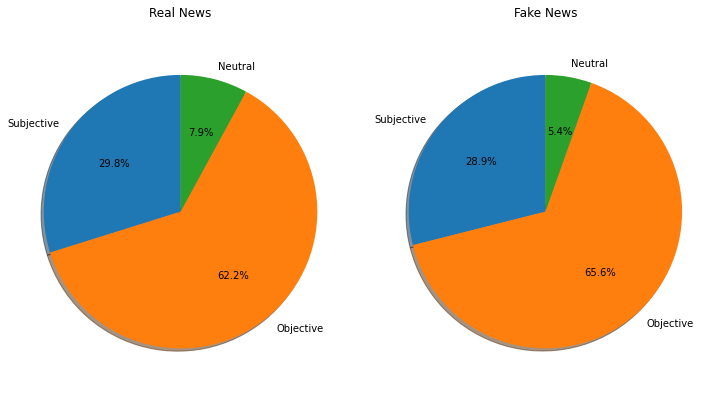

In [48]:
subj_size_real = sub_real_tweets.loc[sub_real_tweets['subjectivity']>0.5].shape[0]
obj_size_real = sub_real_tweets.loc[sub_real_tweets['subjectivity']<0.5].shape[0]
neu_size_real = sub_real_tweets.loc[sub_real_tweets['subjectivity']==0.5].shape[0]

sizes_real = [subj_size_real, obj_size_real, neu_size_real]

subj_size_fake = sub_fake_tweets.loc[sub_fake_tweets['subjectivity']>0.5].shape[0]
obj_size_fake = sub_fake_tweets.loc[sub_fake_tweets['subjectivity']<0.5].shape[0]
neu_size_fake = sub_fake_tweets.loc[sub_fake_tweets['subjectivity']==0.5].shape[0]

sizes_fake = [subj_size_fake, obj_size_fake, neu_size_fake]

fig2, ax2 = plt.subplots(nrows=1, ncols=2, figsize=(12,7))

ax2[0].pie(sizes_real,  labels=subjectivity_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax2[0].axis('equal') 
ax2[0].title.set_text("Real News")

ax2[1].pie(sizes_fake,  labels=subjectivity_labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2[1].axis('equal') 
ax2[1].title.set_text("Fake News")
plt.show()

## Word & Phrase Count Analysis

In [56]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import ngrams
from collections import Counter

def word_frequency(sentences):
    all_sentences = " ".join(sentences)

    tokens = word_tokenize(all_sentences)
    tokens = [t.lower() for t in tokens]
    stopwords_extended = stopwords.words('english')
    stopwords_extended.extend(["amp", "rt"])
    tokens = [t for t in tokens if t not in stopwords_extended]
    tokens = [t for t in tokens if t.isalpha()]
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(t) for t in tokens]

    counted_words = Counter(tokens)
    counted_pairs = Counter(ngrams(tokens, 2))

    word_freq = pd.DataFrame(counted_words.items(), columns=[
                             'word', 'frequency']).sort_values(by='frequency', ascending=False)

    word_pairs = pd.DataFrame(counted_pairs.items(), columns=[
                              'pairs', 'frequency']).sort_values(by='frequency', ascending=False)

    return word_freq, word_pairs

In [57]:
word_freq_real, word_pairs_real = word_frequency(sub_real_tweets["text"])

In [58]:
word_freq_fake, word_pairs_fake = word_frequency(sub_fake_tweets["text"])

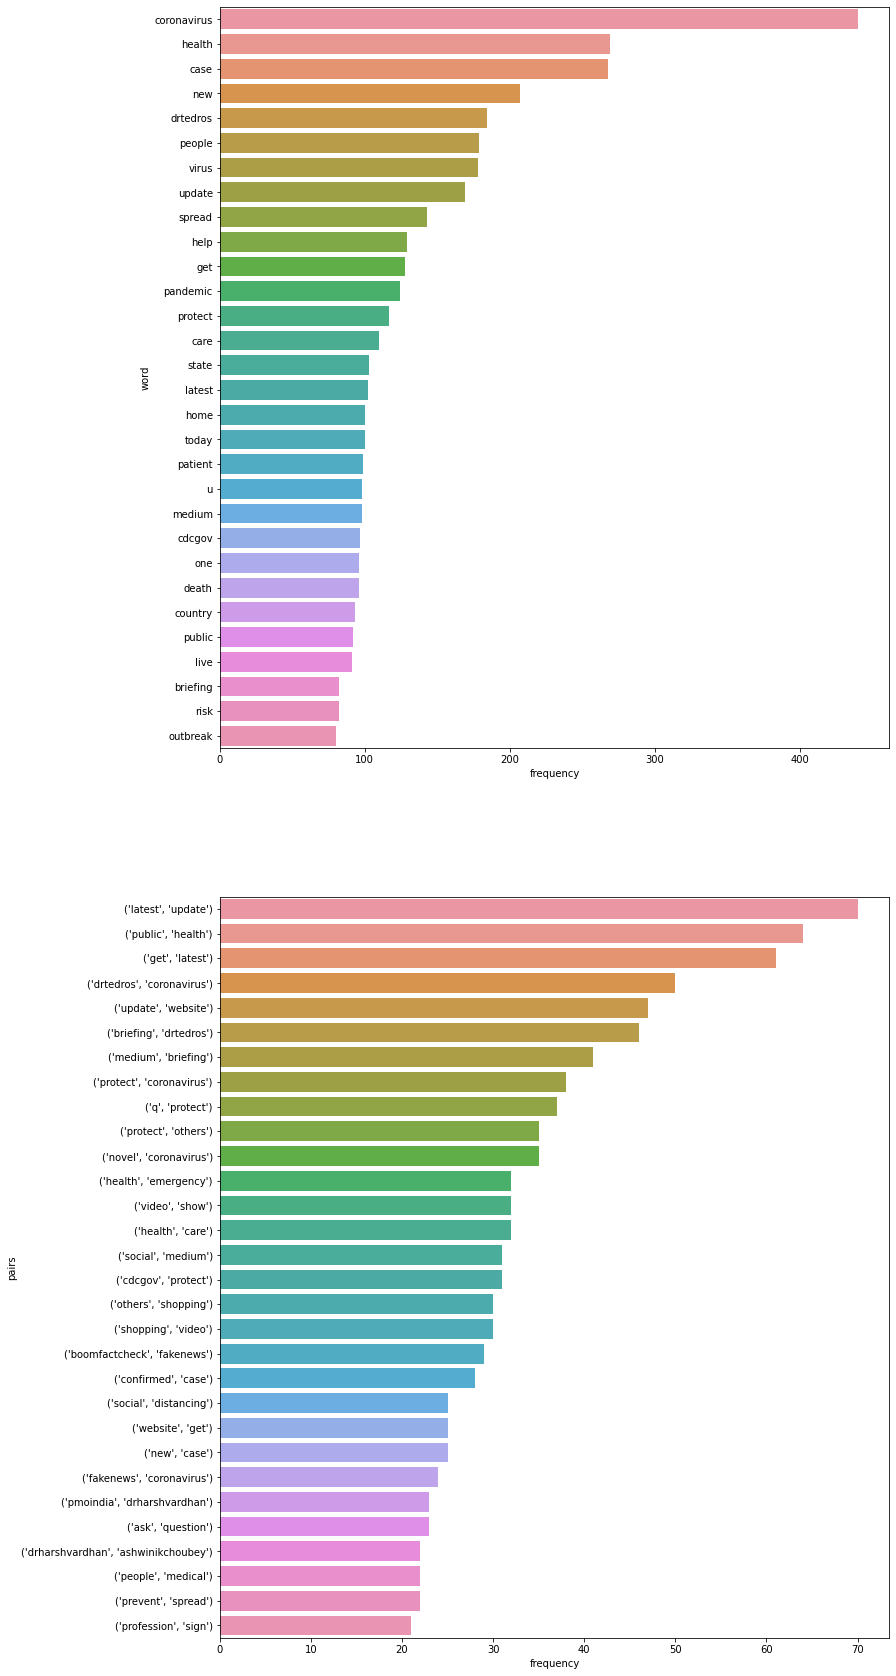

In [59]:
import seaborn as sns
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(12,30))
sns.barplot(ax=axes[0], x='frequency', y='word', data=word_freq_real.head(30))
sns.barplot(ax=axes[1], x='frequency', y='pairs', data=word_pairs_real.head(30))

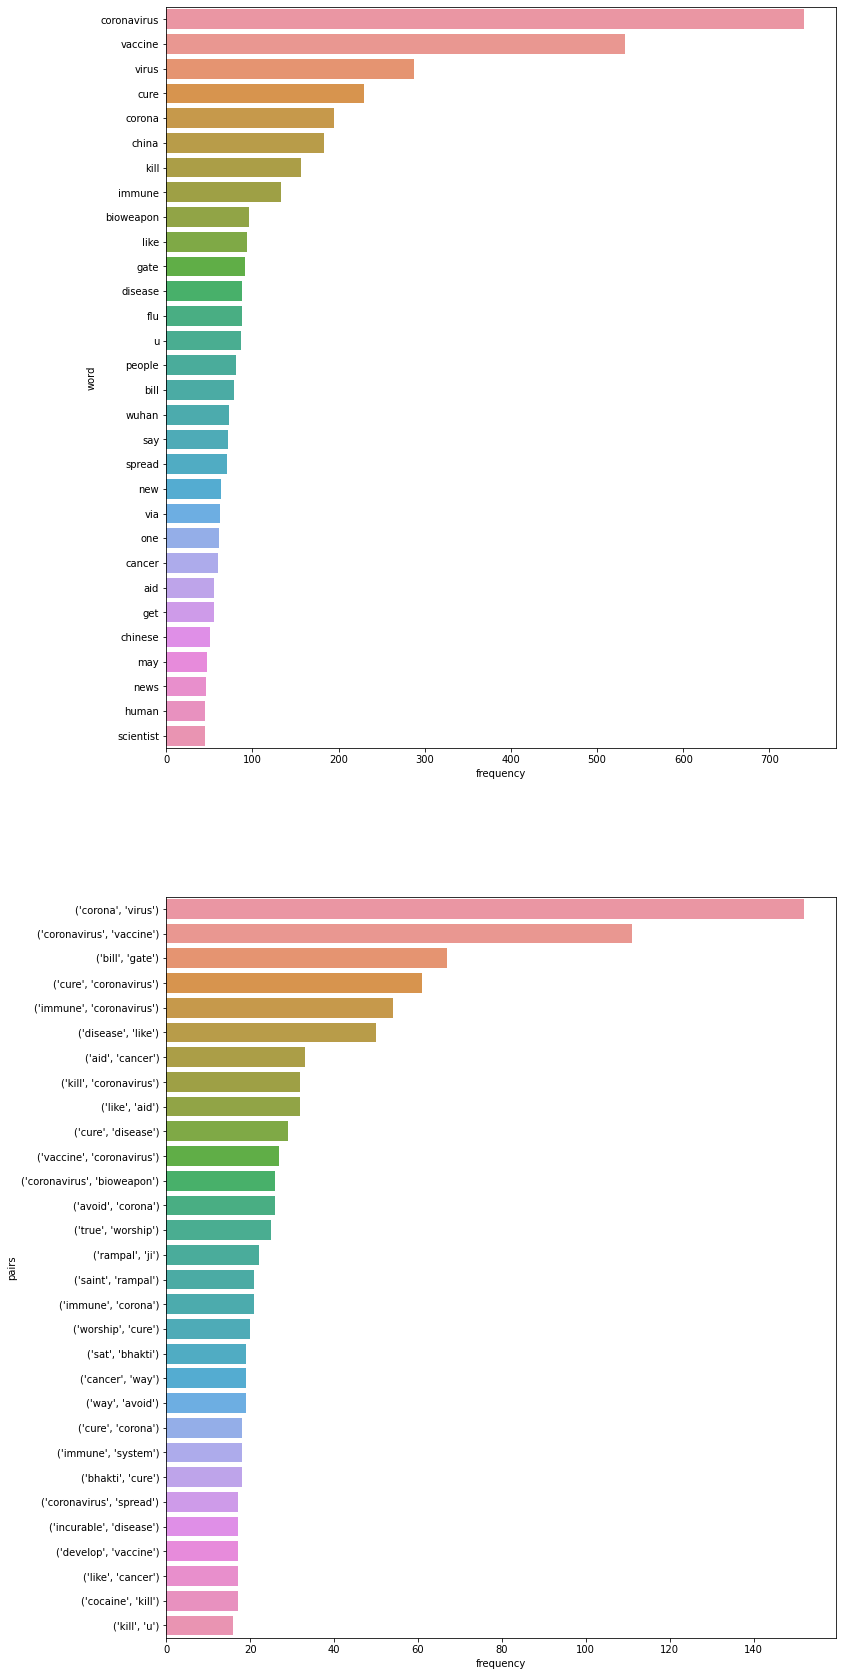

In [60]:
import seaborn as sns
# create subplot of the different data frames
fig, axes = plt.subplots(2,1,figsize=(12,30))
sns.barplot(ax=axes[0], x='frequency', y='word', data=word_freq_fake.head(30))
sns.barplot(ax=axes[1], x='frequency', y='pairs', data=word_pairs_fake.head(30))

### WordCloud Visualization

In [61]:
from wordcloud import WordCloud

In [62]:
real_pair_dict = dict()
for index, content in word_freq_real.iterrows():
    real_pair_dict[content["word"]] = content["frequency"]

fake_pair_dict = dict()
for index, content in word_freq_fake.iterrows():
    fake_pair_dict[content["word"]] = content["frequency"]


In [63]:
real_wordcloud = WordCloud(collocations=False).generate_from_frequencies(real_pair_dict)
fake_wordcloud = WordCloud(collocations=False).generate_from_frequencies(fake_pair_dict)

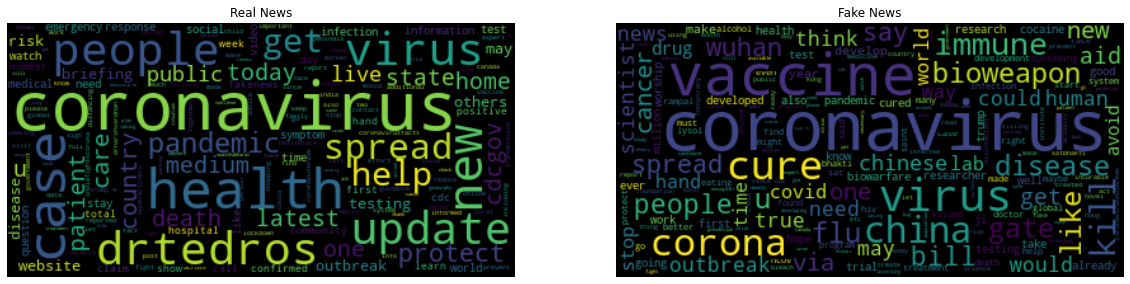

In [64]:
fig2, ax3 = plt.subplots(nrows=1, ncols=2, figsize=(20,15))

ax3[0].imshow(real_wordcloud, interpolation='bilinear')
ax3[0].title.set_text("Real News")
ax3[0].axis("off")
ax3[1].imshow(fake_wordcloud, interpolation='bilinear')
ax3[1].title.set_text("Fake News")
ax3[1].axis("off")

plt.axis("off")
plt.show()

In [65]:
real_pair_dict = dict()
for index, content in word_pairs_real.iterrows():
    pair = "_".join(content["pairs"])
    real_pair_dict[pair] = content["frequency"]

fake_pair_dict = dict()
for index, content in word_pairs_fake.iterrows():
    pair = "_".join(content["pairs"])
    fake_pair_dict[pair] = content["frequency"]

In [66]:
real_pair_wordcloud = WordCloud(collocations=False).generate_from_frequencies(real_pair_dict)
fake_pair_wordcloud = WordCloud(collocations=False).generate_from_frequencies(fake_pair_dict)

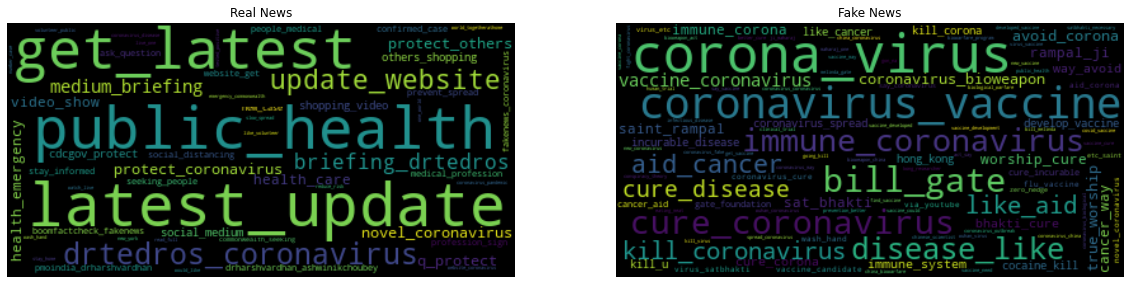

In [67]:
fig2, ax4 = plt.subplots(nrows=1, ncols=2, figsize=(20,20))

ax4[0].imshow(real_pair_wordcloud, interpolation='bilinear')
ax4[0].title.set_text("Real News")
ax4[0].axis("off")
ax4[1].imshow(fake_pair_wordcloud, interpolation='bilinear')
ax4[1].title.set_text("Fake News")
ax4[1].axis("off")

plt.axis("off")
plt.show()

## Hashtag and Mention Analysis

In [68]:
def field_frequency(values):
    joined_values = " ".join(values)

    tokens = word_tokenize(joined_values)
    tokens = [t.lower() for t in tokens]

    counted = Counter(tokens)

    word_freq = pd.DataFrame(counted.items(), columns=[
                             'field', 'frequency']).sort_values(by='frequency', ascending=False)
    return word_freq

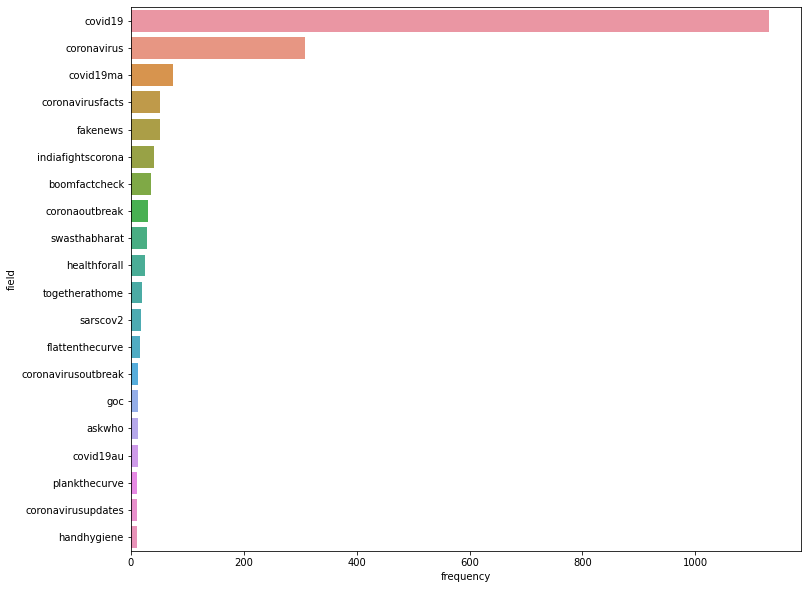

In [69]:
all_real_tags = []
[all_real_tags.extend(tags) for tags in sub_real_tweets['hashtags']]
tag_freq_real = field_frequency(all_real_tags)
# create subplot of the different data frames
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(ax=axes, x='frequency', y='field',
            data=tag_freq_real.head(20), label='big')

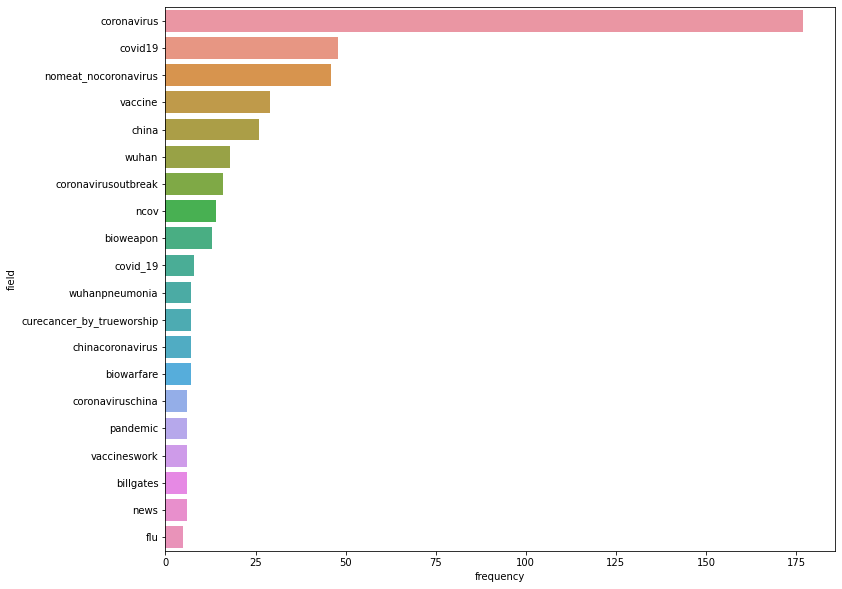

In [70]:
all_fake_tags = []
[all_fake_tags.extend(tags) for tags in sub_fake_tweets['hashtags']]
tag_freq_fake = field_frequency(all_fake_tags)
# create subplot of the different data frames
fig, axes = plt.subplots(1, 1, figsize=(12, 10))
sns.barplot(ax=axes, x='frequency', y='field',
            data=tag_freq_fake.head(20), label='big')


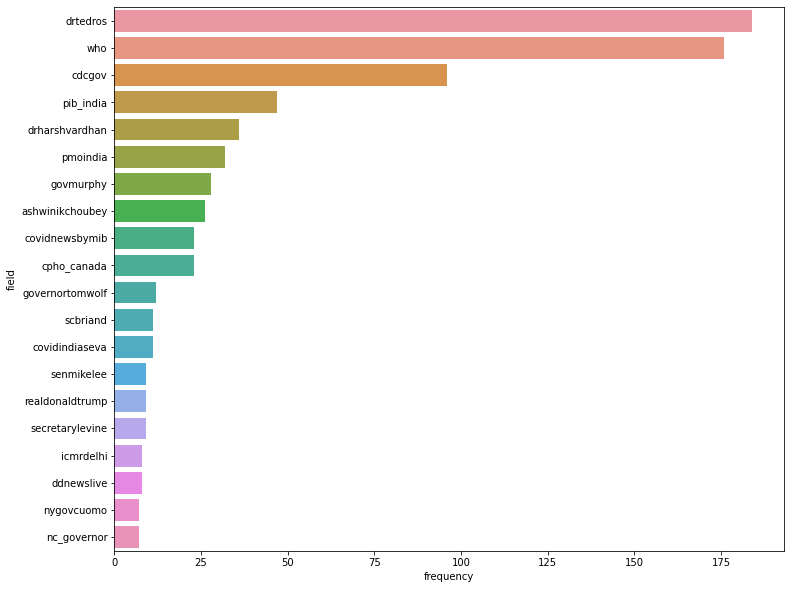

In [71]:
all_real_mentions = []
[all_real_mentions.extend(tags) for tags in sub_real_tweets['mentions']];
tag_freq_real= field_frequency(all_real_mentions)
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='field', data=tag_freq_real.head(20), label='big')

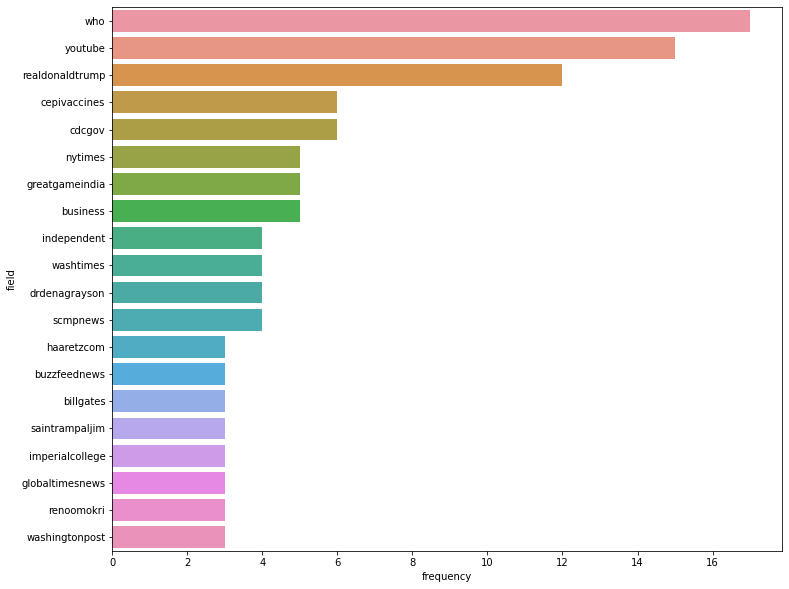

In [72]:
all_fake_mentions = []
[all_fake_mentions.extend(tags) for tags in sub_fake_tweets['mentions']];
tag_freq_fake= field_frequency(all_fake_mentions)

# create subplot of the different data frames
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='field', data=tag_freq_fake.head(20), label='big')

## Numeric Fields Analysis

In [73]:
sub_real_tweets.head()

,text,mentions,urls,hashtags,retweet_count,reply_count,like_count,owner_username,retweeter_username,location,retweeter_followers_count,retweeter_following_count,retweeter_tweet_count,polarity,subjectivity
0,RT @WHO: Media briefing on #COVID19 with @DrTe...,"[WHO, DrTedros]",[https://t.co/WC2ljICW8i],[COVID19],892,0,0,WHO,Prof_Manohara,"Nagpur, India",195,613,3873,0.0,0.0
1,"""In Wuhan, 🇨🇳 the 1st cluster of #COVID19 case...",[DrTedros],[],[COVID19],55,12,123,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.4,0.7
2,Media briefing on #COVID19 with @DrTedros. #co...,[DrTedros],[https://t.co/e5rc2jbeZu],"[COVID19, coronavirus]",1845,500,3642,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0
3,RT @WHO: WHO’s #COVID19 response includes a pr...,[WHO],[],[COVID19],251,0,0,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0
4,#AskWHO about breastfeeding during #COVID19,[],[https://t.co/7CPwA7YmFl],"[AskWHO, COVID19]",358,95,926,WHO,WHO,"Geneva, Switzerland",11078491,1751,68999,0.0,0.0


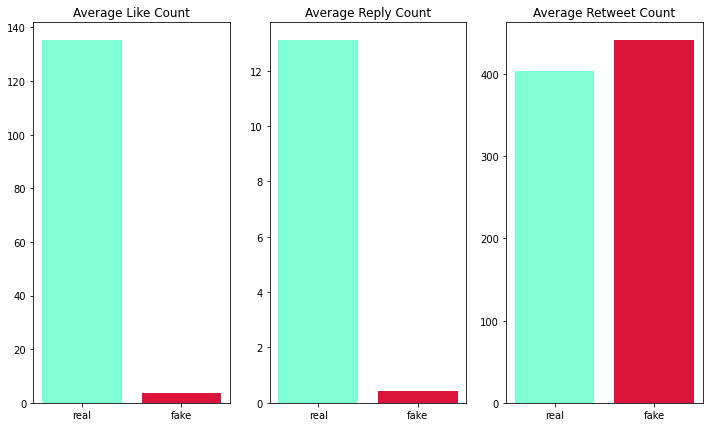

In [74]:
fig4, ax4 = plt.subplots(nrows=1, ncols=3, figsize=(12,7))

ax4[0].bar(["real", "fake"],[sub_real_tweets['like_count'].mean(), sub_fake_tweets['like_count'].mean()], color = ["aquamarine", "crimson"])
ax4[0].title.set_text("Average Like Count")


ax4[1].bar(["real", "fake"],[sub_real_tweets['reply_count'].mean(), sub_fake_tweets['reply_count'].mean()], color = ["aquamarine", "crimson"])
ax4[1].title.set_text("Average Reply Count")

ax4[2].bar(["real", "fake"],[sub_real_tweets['retweet_count'].mean(), sub_fake_tweets['retweet_count'].mean()], color = ["aquamarine", "crimson"])
ax4[2].title.set_text("Average Retweet Count")

plt.show()

In [75]:
sub_real_tweets['retweeter_followers_count'].mean(), sub_fake_tweets['retweeter_followers_count'].mean()

(2528411.5067920587, 22209.607963246555)

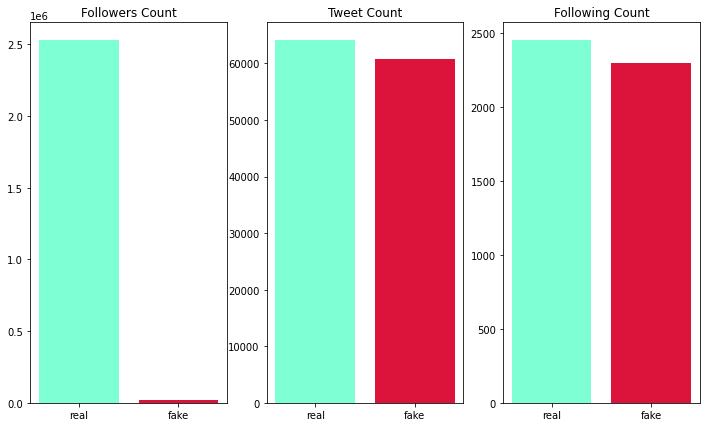

In [76]:
fig4, ax4 = plt.subplots(nrows=1, ncols=3, figsize=(12,7))

ax4[0].bar(["real", "fake"],[sub_real_tweets['retweeter_followers_count'].mean(), sub_fake_tweets['retweeter_followers_count'].mean()], color = ["aquamarine", "crimson"])
ax4[0].title.set_text("Followers Count")


ax4[1].bar(["real", "fake"],[sub_real_tweets['retweeter_tweet_count'].mean(), sub_fake_tweets['retweeter_tweet_count'].mean()], color = ["aquamarine", "crimson"])
ax4[1].title.set_text("Tweet Count")

ax4[2].bar(["real", "fake"],[sub_real_tweets['retweeter_following_count'].mean(), sub_fake_tweets['retweeter_following_count'].mean()], color = ["aquamarine", "crimson"])
ax4[2].title.set_text("Following Count")

plt.show()

## Location Analysis

In [78]:
location_freq_real = Counter(sub_real_tweets['location'])
location_freq_real_df = pd.DataFrame.from_records(location_freq_real.most_common(), columns=['location','frequency'])
location_freq_real_df.head()

,location,frequency
0,"Geneva, Switzerland",179
1,,160
2,Canada,149
3,"Boston, MA",142
4,"Mumbai, India",116


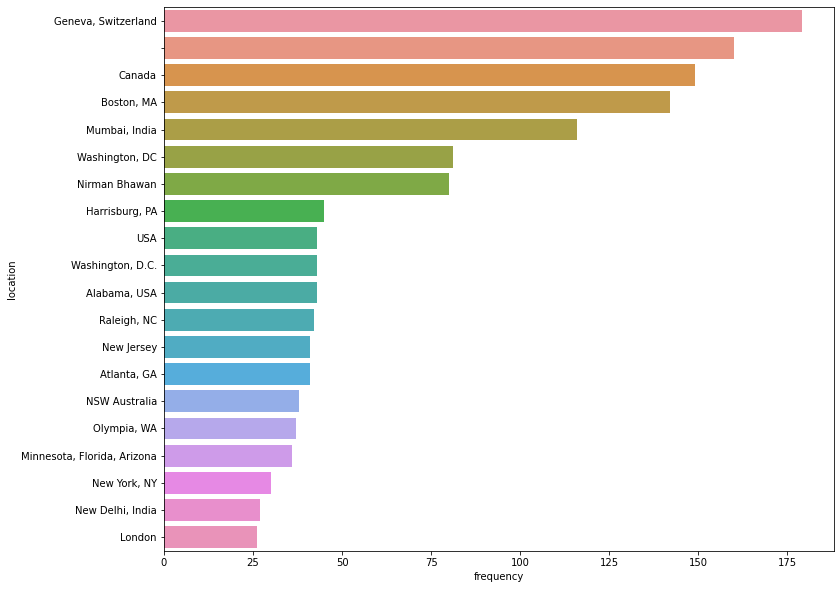

In [79]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='location', data=location_freq_real_df.head(20), label='big')

In [80]:
location_freq_fake = Counter(sub_fake_tweets['location'])
location_freq_fake_df = pd.DataFrame.from_records(location_freq_fake.most_common(), columns=['location','frequency'])
location_freq_fake_df.head()

,location,frequency
0,,391
1,India,17
2,"London, England",11
3,USA,10
4,"New York, USA",9


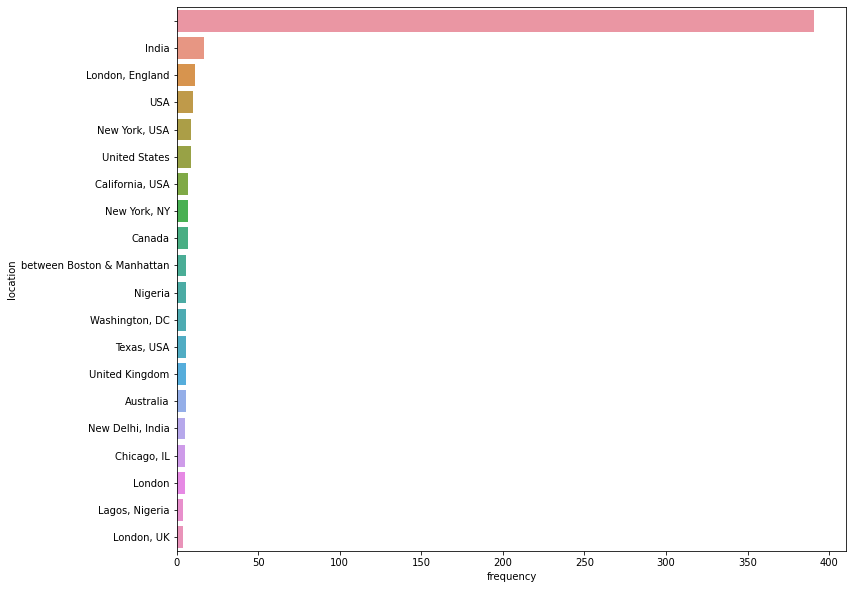

In [81]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='location', data=location_freq_fake_df.head(20), label='big')

## Owner Analysis

In [82]:
owner_username_freq_real = Counter(sub_real_tweets['owner_username'])
owner_username_freq_real_df = pd.DataFrame.from_records(owner_username_freq_real.most_common(), columns=['owner_username','frequency'])
owner_username_freq_real_df.head()

,owner_username,frequency
0,WHO,290
1,CPHO_Canada,112
2,boomlive_in,102
3,MassDPH,96
4,CDCgov,94


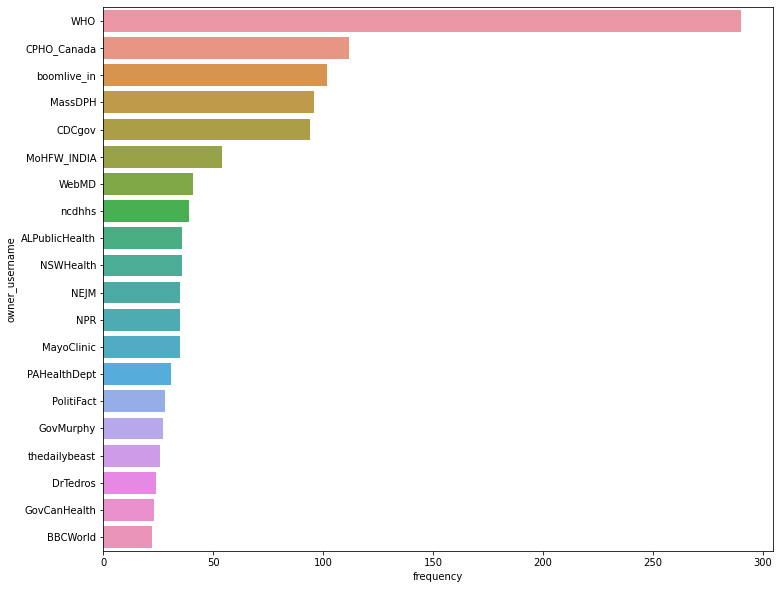

In [83]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='owner_username', data=owner_username_freq_real_df.head(20), label='big')

In [84]:
owner_username_freq_fake = Counter(sub_fake_tweets['owner_username'])
owner_username_freq_fake_df = pd.DataFrame.from_records(owner_username_freq_fake.most_common(), columns=['owner_username','frequency'])
owner_username_freq_fake_df.head()

,owner_username,frequency
0,WHO,7
1,aqualung_,6
2,GreatGameIndia,4
3,Independent,4
4,hollywoodbeach8,4


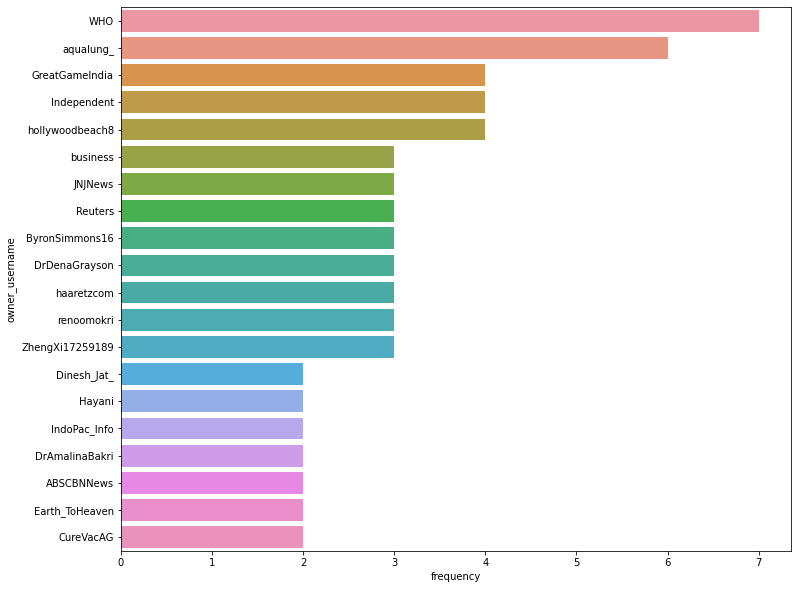

In [85]:
fig, axes = plt.subplots(1,1,figsize=(12,10))
sns.barplot(ax=axes, x='frequency', y='owner_username', data=owner_username_freq_fake_df.head(20), label='big')

## ML Model Training

In [87]:
sub_real_tweets.shape, sub_fake_tweets.shape

((1914, 15), (1306, 15))

In [92]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
import scipy.sparse as sp

In [93]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000,ngram_range=(2,2))
# TF-IDF feature matrix
X_real= tfidf_vectorizer.fit_transform(sub_real_tweets["text"])
X_real.shape

(1914, 4000)

In [94]:
y_real = np.repeat("real", X_real.shape[0])
y_real.shape

(1914,)

In [95]:
tfidf_vectorizer = TfidfVectorizer(max_features=4000,ngram_range=(2,2))
# TF-IDF feature matrix
X_fake= tfidf_vectorizer.fit_transform(sub_fake_tweets["text"])
X_fake.shape

(1306, 4000)

In [96]:
y_fake = np.repeat("fake", X_fake.shape[0])
y_fake.shape

(1306,)

In [97]:
X_combined = sp.vstack((X_real, X_fake))
y_combined = np.concatenate([y_real,y_fake])
X_combined.shape, y_combined.shape

((3220, 4000), (3220,))

In [98]:
y_combined_binary = np.where(y_combined == "real", 1, 0)

In [99]:
num_real = len([y for y in y_combined_binary if y==1])
num_fake = len([y for y in y_combined_binary if y==0])
print(f"num real: {num_real} ")
print(f"num fake: {num_fake} ")

num real: 1914 
num fake: 1306 


In [100]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_combined, y_combined_binary, test_size=0.40, random_state=0)

In [101]:
num_real_train = len([x for x in y_train if x==1])
num_fake_train = len([x for x in y_train if x==0])
num_real_test = len([x for x in y_test if x==1])
num_fake_test = len([x for x in y_test if x==0])
print(f"num_real_train {num_real_train},  num_fake_train {num_fake_train}")
print(f"num_real_test {num_real_test},  num_fake_test {num_fake_test}")

num_real_train 1117,  num_fake_train 815
num_real_test 797,  num_fake_test 491


In [104]:
from sklearn.tree import DecisionTreeClassifier
decision_clf = DecisionTreeClassifier(random_state=42,min_samples_split=5, min_samples_leaf=1)
decision_clf.fit(X_train, y_train)
y_pred = decision_clf.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(decision_clf.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


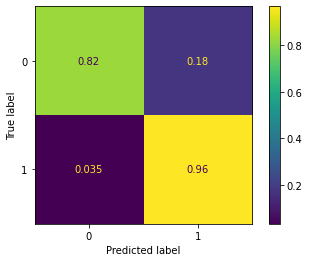

In [105]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(decision_clf, X_test, y_test, normalize="true")  


## DL Model Training

In [156]:
import tensorflow
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow.keras.layers as layers

In [130]:
#corpus_combined = corpus_real + corpus_fake
tweets_combined = list(sub_real_tweets["text"]) + list(sub_fake_tweets["text"])
len(tweets_combined)

3220

In [158]:
#Setting up vocabulary size
vec_size=5000

#One hot encoding 
onehot_enc=[one_hot(words, vec_size)for words in tweets_combined] 

In [159]:
#Setting sentence length
max_length=500

#Padding the sentences
padded_onehat_enc=pad_sequences(onehot_enc,padding='pre',maxlen=max_length)
print(padded_onehat_enc)

[[   0    0    0 ... 3444 4604 3324]
 [   0    0    0 ... 1664 3098 3324]
 [   0    0    0 ... 4604 3324 4355]
 ...
 [   0    0    0 ... 1058 1912 3444]
 [   0    0    0 ... 1664 4355 2388]
 [   0    0    0 ... 3991 1195 1421]]


In [160]:
X_final=np.array(padded_onehat_enc)
y_final=np.array(y_combined_binary)

#Check shape of X and y final
X_final.shape,y_final.shape

((3220, 500), (3220,))

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.40, random_state=42)

In [212]:
embedding_vector_features=40
model=tensorflow.keras.models.Sequential()

model.add(layers.Embedding(vec_size,embedding_vector_features,input_length=max_length))
model.add(layers.Bidirectional(layers.LSTM(100)))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

print(model.summary())

Model: "sequential_27"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_25 (Embedding)    (None, 500, 40)           200000    
                                                                 
 bidirectional_16 (Bidirecti  (None, 200)              112800    
 onal)                                                           
                                                                 
 dropout_41 (Dropout)        (None, 200)               0         
                                                                 
 dense_21 (Dense)            (None, 1)                 201       
                                                                 
Total params: 313,001
Trainable params: 313,001
Non-trainable params: 0
_________________________________________________________________
None


In [213]:
class ThresholdCallback(keras.callbacks.Callback):
    def __init__(self, threshold):
        super(ThresholdCallback, self).__init__()
        self.threshold = threshold

    def on_epoch_end(self, epoch, logs=None): 
        accuracy = logs["val_accuracy"]
        #accuracy = logs["accuracy"]
        if accuracy >= self.threshold:
            self.model.stop_training = True

In [214]:
callback=ThresholdCallback(threshold=0.95)
early_stop = tensorflow.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3, restore_best_weights=True)

# Fitting with 10 epochs and 64 batch size
history = model.fit(X_train, y_train, validation_data=(X_test,y_test), epochs=10, batch_size=64, verbose=1, callbacks=[callback, early_stop])

Epoch 1/10
31/31 [==============================] - 103s 3s/step - loss: 0.6525 - accuracy: 0.6237 - val_loss: 0.5494 - val_accuracy: 0.7446
Epoch 2/10
31/31 [==============================] - 35s 1s/step - loss: 1.0362 - accuracy: 0.6900 - val_loss: 0.7548 - val_accuracy: 0.3944
Epoch 3/10
31/31 [==============================] - 35s 1s/step - loss: 0.6008 - accuracy: 0.6610 - val_loss: 0.3920 - val_accuracy: 0.8634
Epoch 4/10
31/31 [==============================] - 35s 1s/step - loss: 0.5192 - accuracy: 0.8090 - val_loss: 0.6743 - val_accuracy: 0.6056
Epoch 5/10
31/31 [==============================] - 34s 1s/step - loss: 0.6136 - accuracy: 0.6573 - val_loss: 0.5587 - val_accuracy: 0.7073
Epoch 6/10
31/31 [==============================] - 35s 1s/step - loss: 0.4642 - accuracy: 0.8339 - val_loss: 0.3780 - val_accuracy: 0.8828
Epoch 7/10
31/31 [==============================] - 35s 1s/step - loss: 0.2347 - accuracy: 0.9353 - val_loss: 0.2417 - val_accuracy: 0.9115
Epoch 8/10
31/31 [=

In [218]:
from sklearn import metrics

predictions = (model.predict(X_test) > 0.5).astype("int32")

cm = metrics.confusion_matrix(y_test, predictions)

In [219]:
def plot_matrix(cm, classes, title):
  ax = sns.heatmap(cm, cmap="Blues", annot=True, xticklabels=classes, yticklabels=classes, cbar=False)
  ax.set(title=title, xlabel="predicted label", ylabel="true label")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """Entry point for launching an IPython kernel.


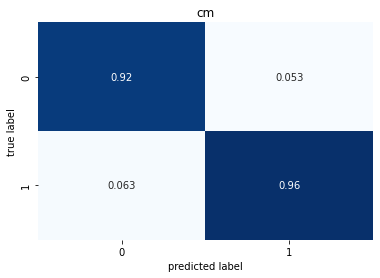

In [220]:
cm_norm = cm / cm.astype(np.float).sum(axis=1)
plot_matrix(cm_norm, ["0", "1"],"cm" )